In [1]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import theano

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv im

In [14]:
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
true_regression_line = true_intercept + true_slope * x
y = true_regression_line + np.random.normal(scale=0.5, size=size)

x_out = np.append(x, [0.1, 0.15, 0.2])
y_out = np.append(y, [8, 6, 9])

data = dict(x=x_out, y=y_out)

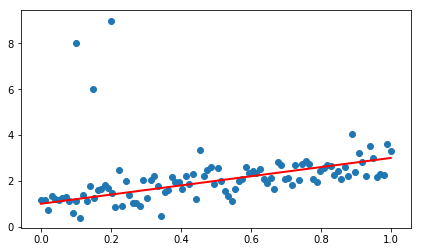

In [20]:
plt.figure(figsize=(7,4))
plt.scatter(x_out, y_out)
plt.plot(x, true_regression_line, lw=2.0, color='r')

In [24]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x', data)
    trace = pm.sample(200, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\ProgramData\Anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd_log__, x, Intercept]
Only 200 samples in chain.
Only 200 samples in chain.
Only 200 samples in chain.
The acceptance probability does not match the target. It is 0.8867985270272039, but should be close to 0.8. Try to increase the number of tuning steps.
Only 200 samples in chain.
The acceptance probability does not match the target. It is 0.8822783073105194, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DF7CC50>,
      dtype=object)

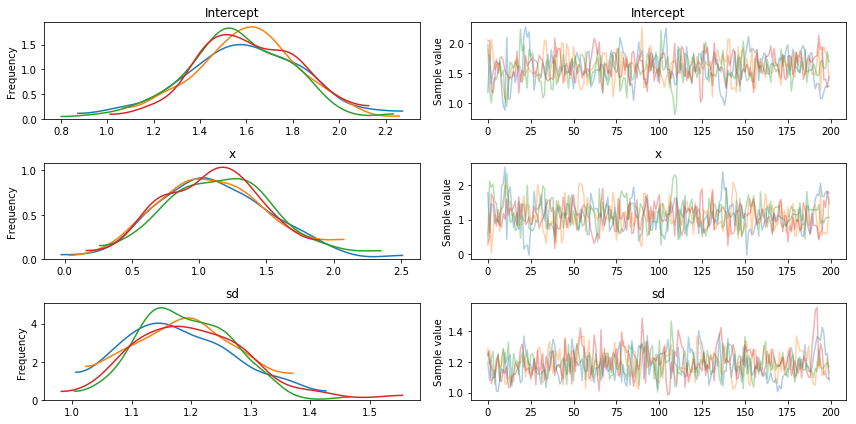

In [25]:
pm.traceplot(trace)

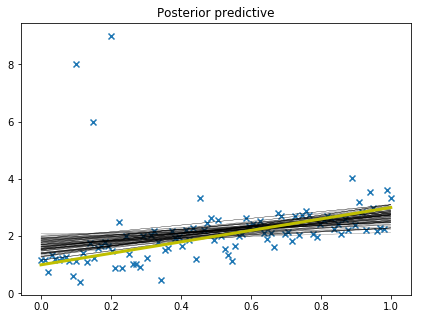

In [32]:
plt.figure(figsize=(7,5))
plt.scatter(x_out, y_out, marker='x')
pm.plot_posterior_predictive_glm(trace, samples=100)
plt.plot(x, true_regression_line, lw=3., color='y')

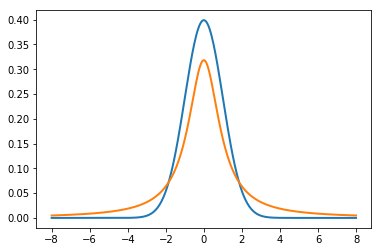

In [40]:
normal_dist = pm.Normal.dist(mu=0, sd=1)
t_dist = pm.StudentT.dist(mu=0, lam=1, nu=1)
x_eval = np.linspace(-8,8,300)
plt.plot(x_eval, theano.tensor.exp(normal_dist.logp(x_eval)).eval(), lw=2.)
plt.plot(x_eval, theano.tensor.exp(t_dist.logp(x_eval)).eval(), lw=2.)

In [41]:
with pm.Model() as model:
    family = pm.glm.families.StudentT()
    pm.glm.GLM.from_formula('y ~ x', data, family=family)
    trace_robust = pm.sample(200, cores=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
C:\ProgramData\Anaconda3\lib\site-packages\pymc3\model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam_log__, x, Intercept]
Only 200 samples in chain.
Only 200 samples in chain.
Only 200 samples in chain.
Only 200 samples in chain.


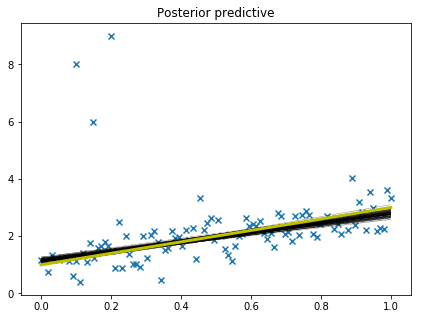

In [42]:
plt.figure(figsize=(7,5))
plt.scatter(x_out, y_out, marker='x')
pm.plot_posterior_predictive_glm(trace_robust, samples=100)
plt.plot(x, true_regression_line, lw=3., color='y')